In [267]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

In [268]:
#a*x**2 + b*x + c = 0

a = 0.5
b = 0.3
c = 0.2

x_data = torch.arange(-2.5, 2.1, 0.1).unsqueeze(dim=1)
y_label = a*x_data**2 + b*x_data + c

X_train = x_data[:int(len(x_data)*0.8)]
Y_train = y_label[:int(len(y_label)*0.8)]

X_test = x_data[int(len(x_data)*0.8):]
Y_test = y_label[int(len(y_label)*0.8):]


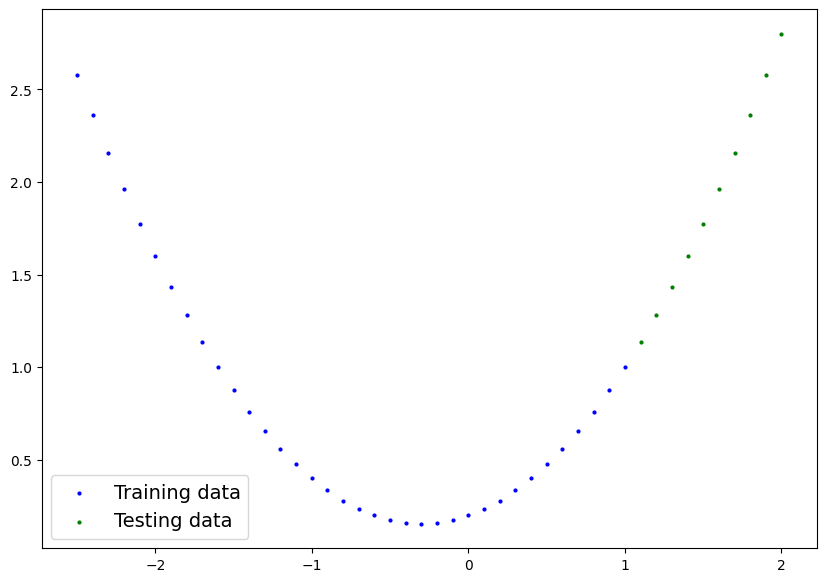

In [269]:
def plot_predictions(training_data=X_train, training_labels=Y_train, testing_data=X_test, testing_labels=Y_test, preds = None):
    plt.figure(figsize=(10, 7))

    plt.scatter(training_data, training_labels, c="b", s=4, label="Training data")
    plt.scatter(testing_data, testing_labels, c="g", s=4, label="Testing data")
    if preds is not None:
        plt.scatter(testing_data, preds, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

plot_predictions()

In [276]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.c = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
    def forward(self, x):
        return self.a*x**2 + self.b*x + self.c



In [277]:
model = MyModel()

In [278]:
optimizer = torch.optim.Rprop(params = model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

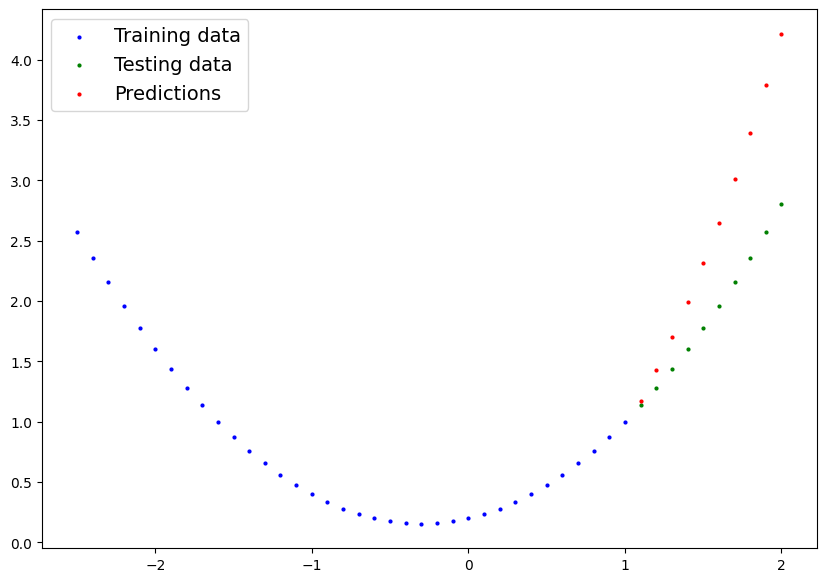

In [280]:
with torch.inference_mode():
    y_preds = model(X_test)

plot_predictions(preds=y_preds)

In [282]:
#TRAIN MODEL:
epoch_nums = []
loss_vals = []
test_loss_vals = []

epochs = 100

for epoch in range(epochs):
    model.train()
    preds = model(X_train)
    loss = loss_fn(preds, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#TEST MODEL:
    model.eval()

    with torch.inference_mode():
        preds = model(X_test)
        test_loss = loss_fn(preds, Y_test)
    
    if epoch % 10 == 0:
        print(f"Loss: {loss}")
        print(f"Test loss: {test_loss}")
        print(model.state_dict())
        epoch_nums.append(epoch)
        loss_vals.append(loss)
        test_loss_vals.append(test_loss)


Loss: 2.034771680831909
Test loss: 0.5618544816970825
OrderedDict([('a', tensor([1.0492])), ('b', tensor([0.0785])), ('c', tensor([-0.2055]))])
Loss: 0.237953320145607
Test loss: 0.043108873069286346
OrderedDict([('a', tensor([0.6754])), ('b', tensor([0.4523])), ('c', tensor([-0.4173]))])
Loss: 0.01330671925097704
Test loss: 0.09143443405628204
OrderedDict([('a', tensor([0.5551])), ('b', tensor([0.3838])), ('c', tensor([0.2266]))])
Loss: 0.001679481822066009
Test loss: 0.041905149817466736
OrderedDict([('a', tensor([0.5384])), ('b', tensor([0.3651])), ('c', tensor([0.2013]))])
Loss: 0.0004047771217301488
Test loss: 0.00563923129811883
OrderedDict([('a', tensor([0.5160])), ('b', tensor([0.3292])), ('c', tensor([0.1867]))])
Loss: 1.4902593648002949e-05
Test loss: 0.00015428801998496056
OrderedDict([('a', tensor([0.5026])), ('b', tensor([0.3048])), ('c', tensor([0.1979]))])
Loss: 1.6587492268627102e-07
Test loss: 8.114805716274986e-09
OrderedDict([('a', tensor([0.5000])), ('b', tensor([0.

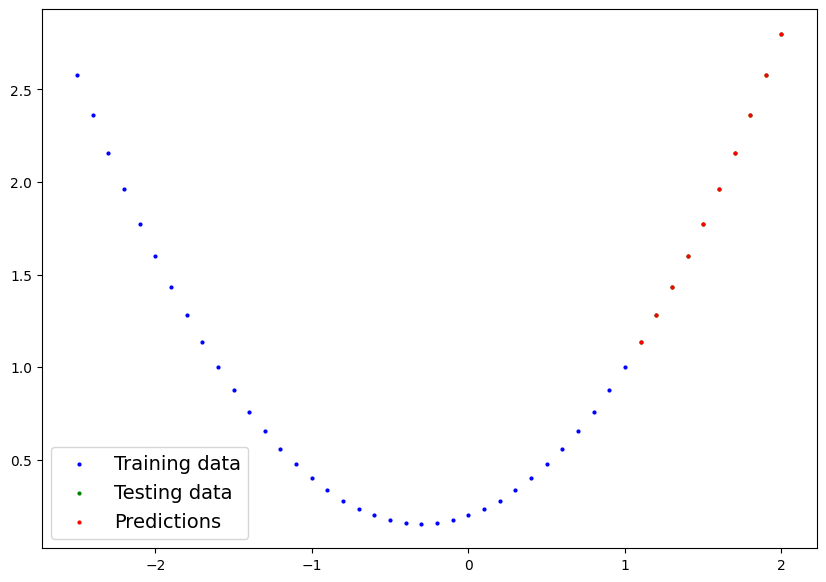

In [284]:
with torch.inference_mode():
    y_preds_new = model(X_test)

plot_predictions(preds=y_preds_new)

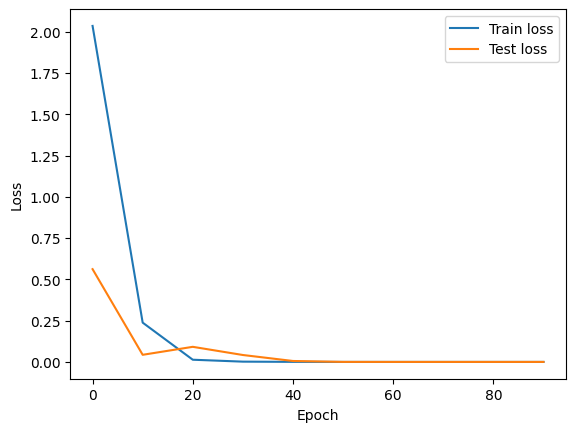

In [285]:
#Plot loss against epochs:

plt.plot(epoch_nums, np.array(torch.tensor(loss_vals).numpy()), label="Train loss")
plt.plot(epoch_nums, np.array(test_loss_vals), label="Test loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()